In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from random import randint

In [2]:
df_for_train = pd.read_csv('fashion-mnist_train.csv')
df_for_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_for_train.shape

(60000, 785)

## here we can see that our data is very balanced

In [4]:
df_for_train['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

# General steps on the Data
**1.** Division into X,y <br>
**2.** StandardScaler on X_train, X_test <br>
**3.** train\test split on X,y. But manual to X_train, y_train (on the training file) and X_test, y_test ( on the test file) <br>
**4.** PCA on X_train <br>
**5.** PCA on X_test

In [5]:
X_train = np.array(df_for_train.drop(columns = ['label']))
y_train = np.array(df_for_train['label'])

In [6]:
X_train = StandardScaler().fit_transform(X_train)

In [7]:
X_train = np.array(df_for_train.drop(columns = ['label']))
y_train = np.array(df_for_train['label'])

In [8]:
X_train.shape

(60000, 784)

In [9]:
y_train.shape

(60000,)

In [10]:
df_for_test = pd.read_csv('fashion-mnist_test.csv')
df_for_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_for_test.shape

(10000, 785)

In [12]:
X_test = np.array(df_for_test.drop(columns = ['label']))
y_test = np.array(df_for_test['label'])

In [13]:
X_test = StandardScaler().fit_transform(X_test)

In [14]:
X_test = np.array(df_for_test.drop(columns = ['label']))
y_test = np.array(df_for_test['label'])

In [15]:
X_test.shape

(10000, 784)

In [16]:
y_test.shape

(10000,)

# PCA

'784'

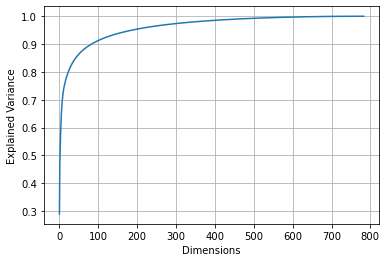

In [17]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.plot(cumsum)
str(pca.n_components_)

- I chose n_components=0.95

In [18]:
pca = PCA(n_components=0.95)
X_train_reduced=pca.fit_transform(X_train)
str(pca.n_components_)
n_pca = pca.n_components_
n_pca

187

### PCA  - 187

# BAGGIGNG XGB <br>  accuracy: 0.5425

In [19]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=9, random_state=42)),
    ("bag_clf", BaggingClassifier(XGBClassifier(verbosity = 0))),
])
pipeline.fit(X_train_reduced, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=9, random_state=42)),
                ('bag_clf',
                 BaggingClassifier(base_estimator=XGBClassifier(base_score=None,
                                                                booster=None,
                                                                colsample_bylevel=None,
                                                                colsample_bynode=None,
                                                                colsample_bytree=None,
                                                                gamma=None,
                                                                gpu_id=None,
                                                                importance_type='gain',
                                                                interaction_constraints=None,
                                                                learning_rate=None,
                                                                m

In [20]:
pca = PCA(n_components=n_pca)
X_test_reduced=pca.fit_transform(X_test)
pca.n_components_

187

In [21]:
pipeline_score = pipeline.score(X_test_reduced, y_test)

In [22]:
param_grid_xgb = dict(kmeans__n_clusters=range(1, 10))
grid_clf_xgb = GridSearchCV(pipeline, param_grid_xgb, cv=3, verbose=2)
grid_clf_xgb.fit(X_train_reduced, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] kmeans__n_clusters=1 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=1, total= 3.2min
[CV] kmeans__n_clusters=1 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[CV] ............................. kmeans__n_clusters=1, total= 3.1min
[CV] kmeans__n_clusters=1 ............................................
[CV] ............................. kmeans__n_clusters=1, total= 3.2min
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total= 3.4min
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total= 3.4min
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=44.4min
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total= 3.2min
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total= 3.6min
[CV] kmeans__n_clusters=3 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 157.6min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=9, random_state=42)),
                                       ('bag_clf',
                                        BaggingClassifier(base_estimator=XGBClassifier(base_score=None,
                                                                                       booster=None,
                                                                                       colsample_bylevel=None,
                                                                                       colsample_bynode=None,
                                                                                       colsample_bytree=None,
                                                                                       gamma=None,
                                                                                       gpu_id=None,
                                                                 

In [23]:
grid_clf_xgb.best_params_

{'kmeans__n_clusters': 9}

In [24]:
grid_clf_xgb.score(X_test_reduced,y_test)

0.5425

# XGBClassifier with no bagging <br> accuracy: 0.5325

In [25]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=9, random_state=42)),
    ("xgbc_model", XGBClassifier(verbosity = 0)),
])
pipeline.fit(X_train_reduced, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=9, random_state=42)),
                ('xgbc_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=0))]

In [26]:
pca = PCA(n_components=n_pca)
X_test_reduced=pca.fit_transform(X_test)
pca.n_components_

187

In [27]:
pipeline_score = pipeline.score(X_test_reduced, y_test)

In [28]:
param_grid_XGBClassifier = dict(kmeans__n_clusters=range(1, 10))
grid_clf_XGBClassifier = GridSearchCV(pipeline, param_grid_XGBClassifier, cv=3, verbose=2)
grid_clf_XGBClassifier.fit(X_train_reduced, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] kmeans__n_clusters=1 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=1, total=  19.9s
[CV] kmeans__n_clusters=1 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.8s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=1, total=  19.9s
[CV] kmeans__n_clusters=1 ............................................
[CV] ............................. kmeans__n_clusters=1, total=  19.8s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=  23.9s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=  22.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=  22.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=  24.6s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=  24.5s
[CV] kmeans__n_clusters=3 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 13.1min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=9, random_state=42)),
                                       ('xgbc_model',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0, gpu_id=-1,
                                                      importance_type='gain',
                                                      interaction_constraints='',
                                                      learning_rate=0.300000012,
                                                      max_delta_step=0,
                                             

In [29]:
grid_clf_XGBClassifier.best_params_

{'kmeans__n_clusters': 9}

In [30]:
grid_clf_XGBClassifier.score(X_test_reduced,y_test)

0.5325

# VotingClassifier hard <br> accuracy: 0.8511

In [31]:
rnd_clf = RandomForestClassifier()
xgb_clf = XGBClassifier(verbosity = 0)
knn_clf = KNeighborsClassifier(n_neighbors=3)
dec_clf = DecisionTreeClassifier()

voting_clf_hard = VotingClassifier(
             estimators=[ ('rf', rnd_clf), ('xgb', xgb_clf), ('knn', knn_clf), ('dec', dec_clf)],
             voting='hard')

In [32]:
voting_clf_hard.fit(X_train_reduced, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                 

In [33]:
for clf in (rnd_clf, xgb_clf, knn_clf, dec_clf, voting_clf_hard):
    clf.fit(X_train_reduced, y_train)
    y_pred = clf.predict(X_test_reduced)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.6065
XGBClassifier 0.529
KNeighborsClassifier 0.4931
DecisionTreeClassifier 0.4502
VotingClassifier 0.5865


In [34]:
score_hard = cross_val_score(voting_clf_hard, X_test_reduced, y_test, cv=5).mean()
score_hard

0.8511

# VotingClassifier soft <br> accuracy: 0.8405999999999999

In [35]:
rnd_clf = RandomForestClassifier()
xgb_clf = XGBClassifier(verbosity = 0)
knn_clf = KNeighborsClassifier(n_neighbors=3)
dec_clf = DecisionTreeClassifier()

voting_clf_soft = VotingClassifier(
             estimators=[ ('rf', rnd_clf), ('xgb', xgb_clf), ('knn', knn_clf), ('dec', dec_clf)],
             voting='soft')

In [36]:
voting_clf_soft.fit(X_train_reduced, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                 

In [37]:
for clf in ( rnd_clf, xgb_clf, knn_clf, dec_clf, voting_clf_soft):
    clf.fit(X_train_reduced, y_train)
    y_pred = clf.predict(X_test_reduced)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.6327
XGBClassifier 0.529
KNeighborsClassifier 0.4931
DecisionTreeClassifier 0.452
VotingClassifier 0.5659


In [38]:
scores_soft = cross_val_score(voting_clf_soft, X_test_reduced, y_test, cv=5).mean()
scores_soft

0.8405999999999999

# Just XGBClassifier <br> accuracy: 0.8553000000000001

In [39]:
clf_xgb = XGBClassifier(verbosity = 0)
clf_xgb.fit(X_train_reduced, y_train)
y_pred = clf_xgb.predict(X_test_reduced)

In [40]:
scores = cross_val_score(clf_xgb, X_test_reduced, y_test, cv=5).mean()
scores

0.8553000000000001

# Here i plot confusion matrix of the best model ('Just XGBClassifier') and plot the accuracy in pie chart

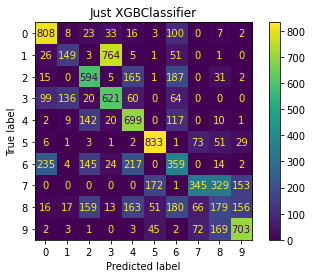

In [43]:
plot_confusion_matrix(clf_xgb.fit(X_train_reduced, y_train), X_test_reduced, y_test)
plt.title('Just XGBClassifier')
plt.show()

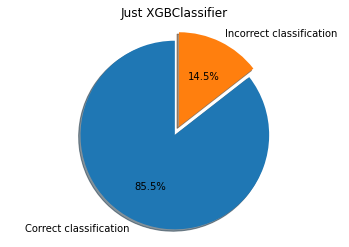

In [44]:
labels = ['Correct classification', 'Incorrect classification']
sizes = [scores.mean(), 1-scores.mean()]
explode = (0.1, 0)  # The cause of separation

fig1, ax1 = plt.subplots()
plt.title('Just XGBClassifier')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

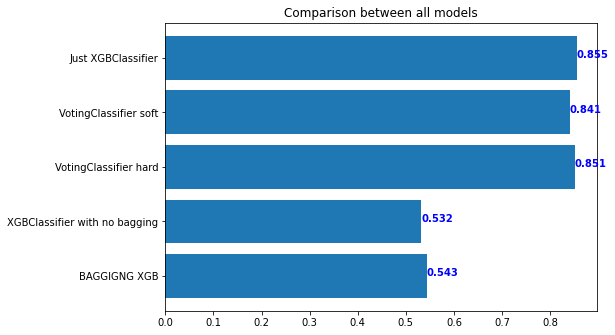

In [46]:
fig = plt.figure()

# [left, bottom, width, height]
axes = fig.add_axes([1,1,1,1])

D = {u'BAGGIGNG XGB':grid_clf_xgb.score(X_test_reduced,y_test),
     u'XGBClassifier with no bagging': grid_clf_XGBClassifier.score(X_test_reduced,y_test),
     u'VotingClassifier hard':score_hard, u'VotingClassifier soft':scores_soft,
    u'Just XGBClassifier': scores}



plt.barh(range(len(D)), list(D.values()), align='center')
plt.yticks(range(len(D)), list(D.keys()),)
plt.title('Comparison between all models')

y = [grid_clf_xgb.score(X_test_reduced,y_test), grid_clf_XGBClassifier.score(X_test_reduced,y_test),
     score_hard, scores_soft, scores]
# print(y)
x = []
for i in y:
    x.append('{:.3f}'.format(i))
# print(x)
x = [float(i) for i in x]
# print(x)

for i, v in enumerate(x):
    plt.text(v, i, str(v), color='blue', fontweight='bold')



plt.show()